## EXCERCISE:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
3. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4. Explain our objective.
5. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7. Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

haberman = pd.read_csv(r"D:\Applied AI\Datasets and DB\haberman.csv", names= ['Age', 'Op_Year', 'axil_nodes', 'Surv_status'])

### Features and class label
> Here Features are:
    * Age - Age of the patient in years
    * Op_Year - Year in which the operation was carried out
    * axil_nodes - No. of axiliary nodes which gave a positive result about the presence of cancer cell
    
> Here the Class label is **Surv_status** which gives status:
    * 1: that the patient survived more than 5 years or more
    * 2: that the patient survived less or equal 5 years span.

In [2]:
# columns which were added while creating the dataframe!
print(haberman.columns)
haberman.head()          # a preliminary tabulated view of our dataset!

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# Number of data pieces we have in the Haberman's dataset
print("Total Number of rows/data pieces we have: ",haberman.shape[0])

Total Number of rows/data pieces we have:  306


* Here after looking at the records per class (below) we can say that the Haberman's cancer survival data set is imbalanced as the datapoints per class has a significant amount of difference!

In [4]:
# Number of datapoints per class ....

DFstatus_1 = haberman.loc[haberman['Surv_status'] == 1]
DFstatus_2 = haberman.loc[haberman['Surv_status'] == 2]

print("Number of patients who survived 5 years or more: ", DFstatus_1.shape[0]) # i.e Datapoints present for patients with Status = 1
print("Number of patients who survived less than 5 years: ", DFstatus_2.shape[0]) # i.e Datapoints present for patients with Status = 2

Number of patients who survived 5 years or more:  225
Number of patients who survived less than 5 years:  81


In [5]:
# Another way of counting the datapoints per class using the builtin function!
haberman['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [6]:
# Statistical Details from the dataset...

haberman.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## BiVariate Analysis -
### Pairplots:

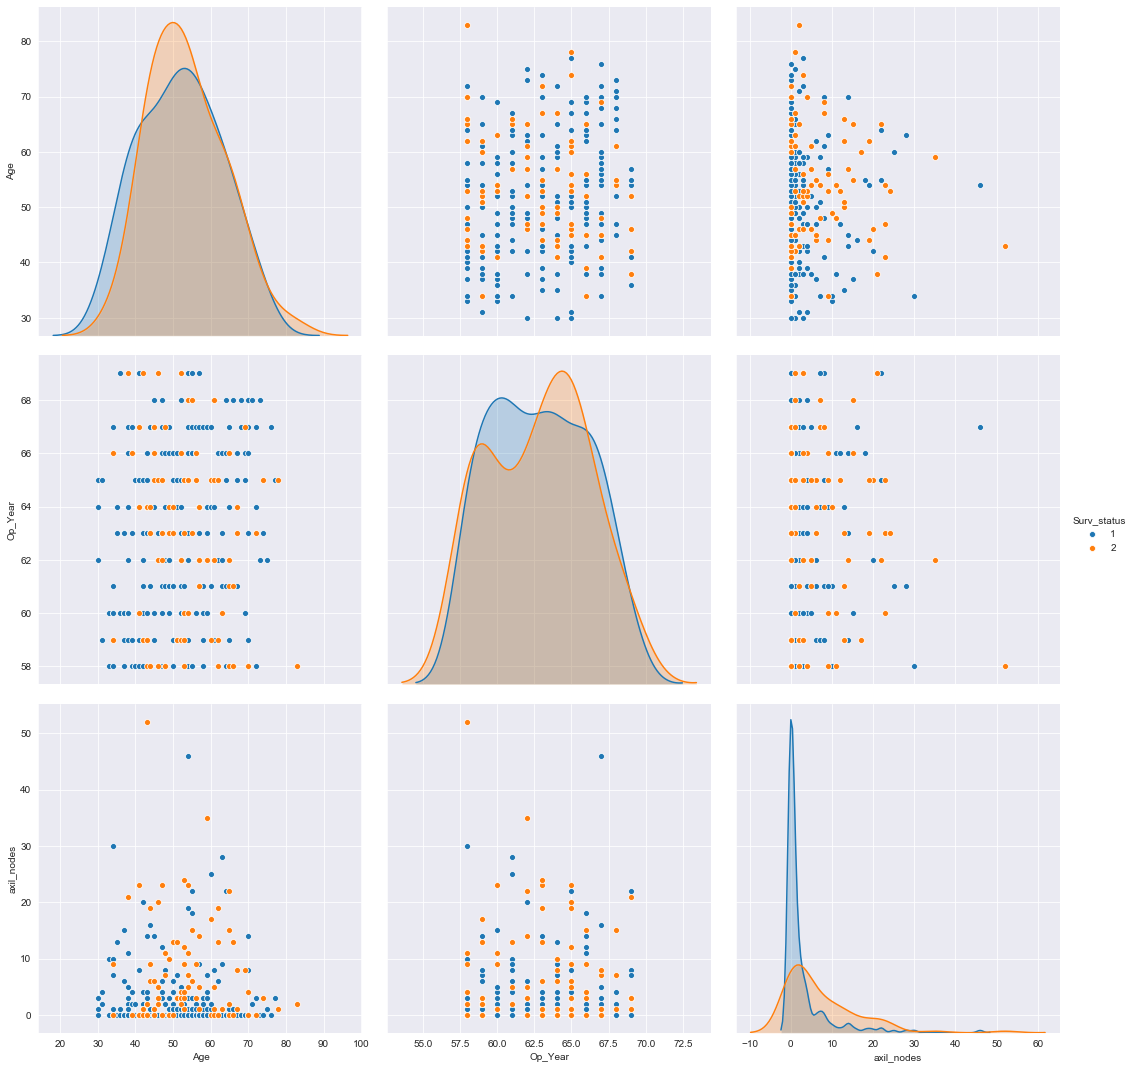

In [7]:
sb.set_style('darkgrid')
sb.pairplot(data = haberman, hue = 'Surv_status', height = 5, vars= ['Age', 'Op_Year', 'axil_nodes'])
plt.show()

<u>**Observations:**</u>
    
    
a.) From the plot- Age Vs. Op_year, where Age is on the Y-axis and Op_Year is on the X-axis, we cannot draw any conclusions out of it as data points cannot be well segregated between into two classes 1 and 2, since the points are radomly oriented into the plane.

b.) From the plot- Age (X-axis) Vs. axil_nodes (Y-axis), we again cannot give any solid conclusion because there are significant amount of  overlapping that is happening b/w the datapoints.

c.) Scatter plot plotted b/w Op_year (Y-axis) and Age (x-axis), also shows random orientation of the datapoints with lots of points getting overlapped with each other, hence both of these features again are not ideal to give any valuable conclusion. Closely when we see its the same graph as that of graph (a.) differing only w.r.t the axes.

d.) The plot which is drawn between- Op_Year represented by Y-axis and axil_nodes repr. by X-axis shows that there are a large number of points are operlaping which makes this graph very less realiable to draw any resultant from it.

e.) Same observation as plot (b.) observations, since the difference is only of the axes representation!

f.) Similar observation as that of plot (d.) since they are mirror images.


### Scatter Plots

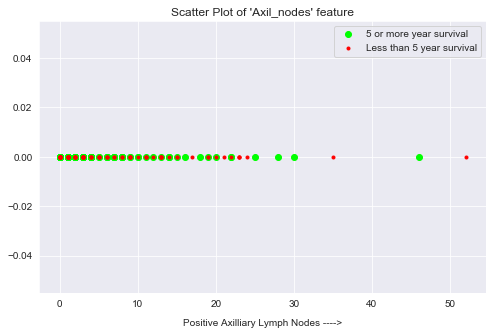

In [8]:
haberman_status1 = haberman.loc[haberman['Surv_status'] == 1]
haberman_status2 = haberman.loc[haberman['Surv_status'] == 2]
plt.figure(figsize = (8,5))
plt.plot(haberman_status1['axil_nodes'], np.zeros_like(haberman_status1['axil_nodes']), 'o', color = 'lime')
plt.plot(haberman_status2['axil_nodes'], np.zeros_like(haberman_status2['axil_nodes']), '.', color = 'red')

plt.legend({'5 or more year survival': haberman_status1, 'Less than 5 year survival': haberman_status2})

plt.xlabel("Positive Axilliary Lymph Nodes ---->", labelpad = 10)
plt.title("Scatter Plot of 'Axil_nodes' feature")
plt.show()


**Obervation:**
* In this 1D scatter plot, we cannot make a fine judgment and derive a model since the for status 1 and Status 2, axil_nodes datapoints are overlapping.

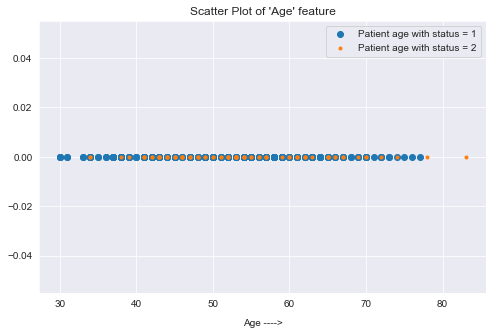

In [9]:
plt.figure(figsize = (8,5))
plt.plot(haberman_status1['Age'], np.zeros_like(haberman_status1['Age']), 'o')
plt.plot(haberman_status2['Age'], np.zeros_like(haberman_status2['Age']), '.')
plt.xlabel('Age ---->', labelpad= 10)
plt.title("Scatter Plot of 'Age' feature")

plt.legend({'Patient age with status = 1': haberman_status1['Age'], 'Patient age with status = 2': haberman_status2['Age']})

plt.show()


**Observation:**

* Same as above, its difficult to get any precise inference from this plot because of overlapping of large datapoints.

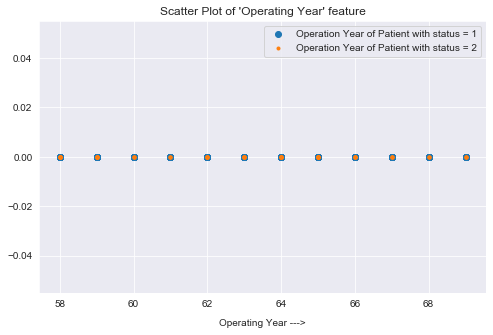

In [10]:
plt.figure(figsize = (8,5))
plt.plot(haberman_status1['Op_Year'], np.zeros_like(haberman_status1['Op_Year']), 'o')
plt.plot(haberman_status2['Op_Year'], np.zeros_like(haberman_status2['Op_Year']), '.')
plt.xlabel('Operating Year --->', labelpad = 10)
plt.title("Scatter Plot of 'Operating Year' feature")
plt.legend({"Operation Year of Patient with status = 1":haberman_status1['Op_Year'], "Operation Year of Patient with status = 2":haberman_status2['Op_Year']})
plt.show()

**Observation:**

* Same as above!

## Univariate Analysis -
### Histograms, PDF and CDF:

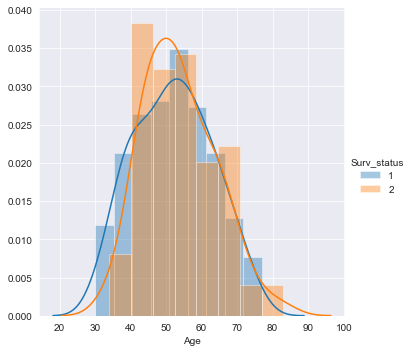

In [11]:
fgrid1 = sb.FacetGrid(data= haberman, height = 5, hue = 'Surv_status')
fgrid1.map(sb.distplot, 'Age').add_legend()
plt.show()

**Observation**
* From this histogram, we can take an inference that the survival status is almost the same from Age range - 41 to 75
* Since this overlap is large feature Age seem like not to be a viable feature to carry our any conclusion!

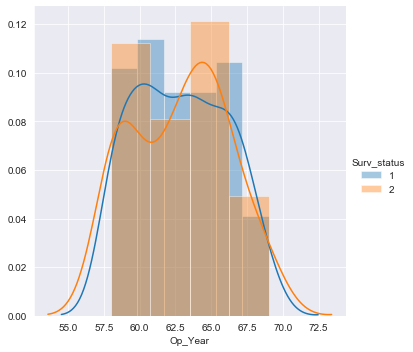

In [12]:
fgrid2 = sb.FacetGrid(data = haberman, hue = 'Surv_status', height = 5)
fgrid2.map(sb.distplot, 'Op_Year').add_legend()
plt.show()

**Observtion:**
* Again becasue of overlapping nature of histogram draw for the feature Operating Year (Op_Year), predicting if a patient survived >= 5 year OR less than 5 year not palusible.

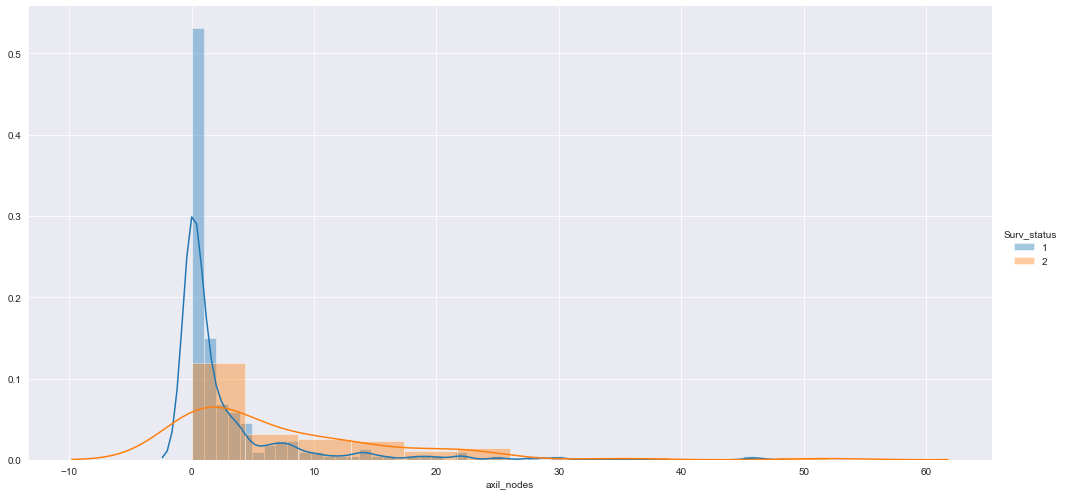

In [13]:
fgrid3 = sb.FacetGrid(data = haberman, hue = 'Surv_status', height = 7, aspect = 2)
fgrid3.map(sb.distplot, 'axil_nodes').add_legend()
plt.show()

**Observation:**
* Compared to other plots which displayed a overlapping nature, this histogram/PDF drawn of the feature positive axilliary nodes **'axil_nodes'** is better.
* We can predict that:
    * If **axil_nodes == 0 AND axil_nodes <= 1**; then the patient have a very higher rate to survive more than 5 years
    * else if **axil_nodes > 1 AND axil_nodes <= 27** then we can predict that the patient may survive less than 5 years time.

In [14]:
SurvivefiveORmore = haberman.loc[haberman['Surv_status'] == 1]
SurviveLessThanFive = haberman.loc[haberman['Surv_status'] == 2]


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


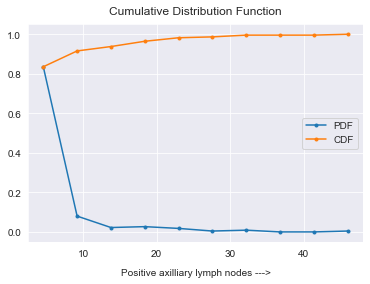

In [15]:
counts, bin_edges = np.histogram(SurvivefiveORmore['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
sb.set_style('darkgrid')
cdf = np.cumsum(pdf)
PDF = plt.plot(bin_edges[1:], pdf, marker = '.')
CDF = plt.plot(bin_edges[1:], cdf, marker = '.')
plt.xlabel("Positive axilliary lymph nodes --->", labelpad = 10)
plt.title("Cumulative Distribution Function", pad = 10)
plt.legend({"PDF": PDF, "CDF": CDF})
plt.show()

**Observations**
* The blue line denotes the PDF and the orange line denotes the CDF of the patients who are going to survive 5 or more years
* From this plot we can see that In the group of patients who survived 5 or more years are almost 82% of the patients which has the count of +ve axilliary lymph nodes <= 3
* About more than 90% of these patients has +ve axilliary lymph nodes > 33

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


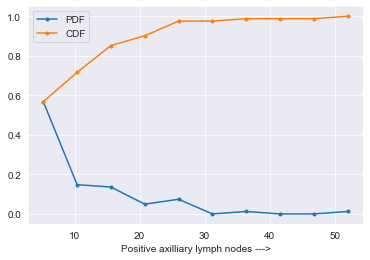

In [16]:
counts, bin_edges = np.histogram(SurviveLessThanFive['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
sb.set_style('darkgrid')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, marker = '.')
plt.plot(bin_edges[1:], cdf, marker = '.')
plt.xlabel("Positive axilliary lymph nodes --->")
plt.legend({"PDF": pdf, "CDF": cdf})
plt.show()

**Observations**
* The blue line denotes the PDF and the orange line denotes the CDF of the patients who are going to survived less than 5 years
* From this plot we can see that, In the group of patients who survived less than 5 years are almost 58% of the patients which has the count of +ve axilliary lymph nodes <= 3
* About more than 90% of these patients has +ve axilliary lymph nodes > 26


## Mean, Median, MAD, Quantiles, IQR

In [17]:
from statsmodels import robust

SurvivefiveORmore = haberman.loc[haberman['Surv_status'] == 1]
SurviveLessThanFive = haberman.loc[haberman['Surv_status'] == 2]

print("******************** (survival >= 5 years) ************************")
print("Mean: ",np.mean(SurvivefiveORmore['axil_nodes']))
print("Median: ",np.median(SurvivefiveORmore['axil_nodes']))
print("MAD: ", robust.mad(SurvivefiveORmore['axil_nodes']))
print("Q1: ", np.percentile(SurvivefiveORmore['axil_nodes'], 25))
print("Q2: ", np.percentile(SurvivefiveORmore['axil_nodes'], 50))
print("Q3: ", np.percentile(SurvivefiveORmore['axil_nodes'], 75))
print("IQR(Q3-Q1): ",np.percentile(SurvivefiveORmore['axil_nodes'], 75)-np.percentile(SurvivefiveORmore['axil_nodes'], 25))

print("\n******************** (survival < 5 years) ************************")
print("Mean: ",np.mean(SurviveLessThanFive['axil_nodes']))
print("Median: ",np.median(SurviveLessThanFive['axil_nodes']))
print("MAD: ", robust.mad(SurviveLessThanFive['axil_nodes']))
print("Q1: ", np.percentile(SurviveLessThanFive['axil_nodes'], 25))
print("Q2: ", np.percentile(SurviveLessThanFive['axil_nodes'], 50))
print("Q3: ", np.percentile(SurviveLessThanFive['axil_nodes'], 75))
print("IQR(Q3-Q1): ",np.percentile(SurviveLessThanFive['axil_nodes'], 75)-np.percentile(SurviveLessThanFive['axil_nodes'], 25))


******************** (survival >= 5 years) ************************
Mean:  2.7911111111111113
Median:  0.0
MAD:  0.0
Q1:  0.0
Q2:  0.0
Q3:  3.0
IQR(Q3-Q1):  3.0

******************** (survival < 5 years) ************************
Mean:  7.45679012345679
Median:  4.0
MAD:  5.930408874022408
Q1:  1.0
Q2:  4.0
Q3:  11.0
IQR(Q3-Q1):  10.0


## Boxplots

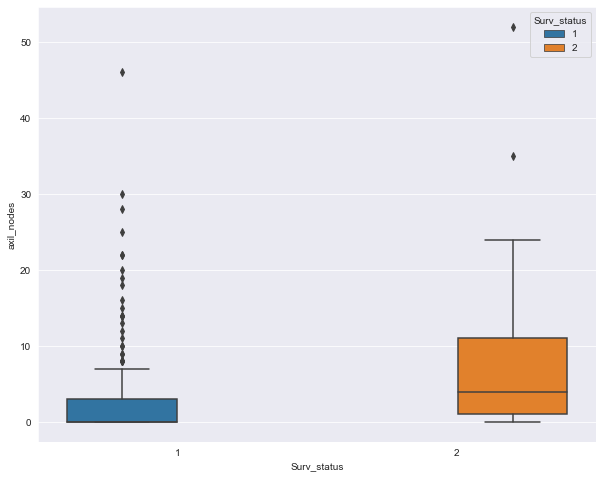

In [18]:
plt.figure(figsize = (10,8))
sb.boxplot(y = 'axil_nodes', x = 'Surv_status', data = haberman, hue = 'Surv_status')
plt.show()

**Observations**
* From the calculation and from the boxplot (of status "1") above we can see that there are 75% of the patients which have +ve Auxilliary lymph nodes <= 3 and have lived 5 or more years.
* Also, the box plots mentions that there 50% percent of the patients who survived 5 or more years have no +ve Auxilliary lymph nodes found.

* Boxplot of status "2" and the calculation above shows that there are 25% of patients which has 
  +ve Auxilliary lymph nodes > 0 and <= 1 those who survived less than 5 years
* The boxplot of status "2" also shows that patients after having lymph node count >=1 and <= 7 also has chances of           surviving 5 or more years.


### Violin Plot

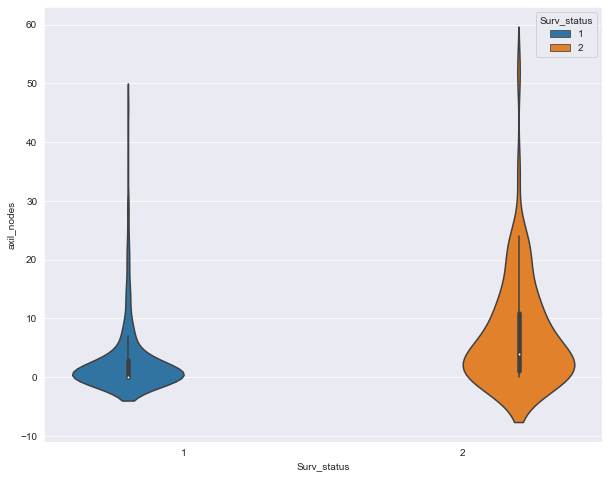

In [19]:
plt.figure(figsize = (10,8))
sb.violinplot(x = 'Surv_status', y = 'axil_nodes', data = haberman, hue = 'Surv_status')
plt.show()

**Observation**
* Count of +ve lymph nodes of the patients living 5 or more years is denser between range 0 to 4
* On the other hand it can be seen that for those patients who didn't survived 5 years had larger counts of +ve lumph nodes 

## Overall Conclusion:
* Its very evident that, the datapoints under these features are not linearly seperable.
* After analysing all dataset and representing these using the multiple features we can say that there is significant of overlapping between the features except the 'axil_nodes' feaure, hence its difficuluts to draw any plausible conclusion out using other.
* We indeed can say that the feature- "axil_nodes" can give us a better conclusion in predicting the survival chances of a patient as compared to other features like- Age and Op_Year(year of operation)!